In [1]:
# Import necessary libraries for the project

# System libraries
import os
import datetime

# Data manipulation
import numpy as np  # Efficient array operations
import pandas as pd  # Data structures for working with structured data

# Data visualization
import matplotlib.pyplot as plt  # Plotting and data visualization
import seaborn as sns  # Further data visualization

# Preprocessing
from sklearn.preprocessing import MinMaxScaler  # Scales data to a range [0, 1]

# Deep learning
import tensorflow as tf  # Core machine learning framework
from keras.api.models import Model  # Model class
from keras.api.layers import Input, Dense  # Layers for the model
from keras.api.optimizers import Adam  # Optimizer for the model
from keras.api.losses import MeanSquaredError  # Loss function for the model

2025-03-03 15:40:35.844703: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-03 15:40:35.845346: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 15:40:35.847999: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 15:40:35.856430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741003835.870912   30181 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741003835.87

In [2]:
# Function definition for the project

# Function to analyze a dataset (statistical analysis)
def analyze_dataset(train_data, train_labels, test_data, test_labels):
    """
    Perform statistical analysis of the dataset, including:
    - Shape and data types
    - Missing values
    - Summary statistics

    Parameters:
        train_data (numpy.ndarray): Training feature set
        test_data (numpy.ndarray): Testing feature set
        train_labels (numpy.ndarray): Training labels
        test_labels (numpy.ndarray): Testing labels
    """

    # Print header for the function
    print("\n🎯 Dataset Analysis 🎯\n")
    # Convert to DataFrame for better analysis
    train_df = pd.DataFrame(train_data)
    test_df = pd.DataFrame(test_data)
    train_labels_df = pd.DataFrame(train_labels, columns=[''])
    test_labels_df = pd.DataFrame(test_labels, columns=[''])

    # Dataset Shape and Data Types
    print("\n🔹 Dataset Shape & Data Types:\n")
    print(f"Train data shape: {train_data.shape}, Type: {train_data.dtype}")
    print(f"Test data shape: {test_data.shape}, Type: {test_data.dtype}")
    print(f"Train labels shape: {train_labels.shape}, Type: {train_labels.dtype}")
    print(f"Test labels shape: {test_labels.shape}, Type: {test_labels.dtype}")

    # Checking for Missing Values
    print("\n🔹 Missing Values:\n")
    print(f"Train data missing values: {np.isnan(train_data).sum()}")
    print(f"Test data missing values: {np.isnan(test_data).sum()}")
    print(f"Train labels missing values: {np.isnan(train_labels).sum()}")
    print(f"Test labels missing values: {np.isnan(test_labels).sum()}")

    # Summary Statistics (using DataFrame)
    print("\n🔹 Statistical Summary:\n")
    print("\nTrain Data Statistics:\n\n", train_df.describe())
    print("\nTest Data Statistics:\n\n", test_df.describe())
    print("\nTrain Labels Statistics:\n", train_labels_df.describe())
    print("\nTest Labels Statistics:\n", test_labels_df.describe())

# Function to preprocess a dataset (normalization, reshaping, etc.)
def preprocess_dataset(train_data, train_labels, test_data, test_labels):
    """
    Preprocesses data for regression models:
    - Reshapes labels
    - Prints pre-normalization min/max ranges
    - Applies MinMaxScaler normalization
    - Prints post-normalization min/max ranges
    - Converts data types to float32 for optimization

    Returns:
    - Scaled train_data, train_labels, test_data, test_labels
    """

    # Print header for the function
    print("\n🎯 Preprocessing Steps 🎯\n")

    # Reshape labels to ensure compatibility
    train_labels = np.reshape(train_labels, (-1, 1))
    test_labels = np.reshape(test_labels, (-1, 1))

    print("\n🔹 Shapes After Reshaping:")
    print("Train Labels Shape:", train_labels.shape)
    print("Test Labels Shape:", test_labels.shape)

    # Check pre-normalization min/max values
    train_data_min, train_data_max = train_data.min(axis=0), train_data.max(axis=0)
    test_data_min, test_data_max = test_data.min(axis=0), test_data.max(axis=0)
    train_labels_min, train_labels_max = train_labels.min(axis=0), train_labels.max(axis=0)
    test_labels_min, test_labels_max = test_labels.min(axis=0), test_labels.max(axis=0)

    print("\n🔹 Pre-Normalization Data Ranges:")
    print("Train Data Min:", train_data_min, "\nTrain Data Max:", train_data_max)
    print("Test Data Min:", test_data_min, "\nTest Data Max:", test_data_max)

    # Fit the scaler on training data only
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(train_data)

    # Transform both training and test data using the scaler
    train_data = min_max_scaler.transform(train_data)
    test_data = min_max_scaler.transform(test_data)

    # Check post-normalization min/max values
    train_min_post, train_max_post = train_data.min(axis=0), train_data.max(axis=0)
    test_min_post, test_max_post = test_data.min(axis=0), test_data.max(axis=0)

    print("\n🔹 Post-Normalization Data Ranges:")
    print("Post-Normalization Train Data Min:", train_min_post, "\nPost-Normalization Train Data Max:", train_max_post)
    print("Post-Normalization Test Data Min:", test_min_post, "\nPost-Normalization Test Data Max:", test_max_post)

    # Print min/max values for labels
    print("\n🔹 (Optional) Label Ranges:")
    print("Train Labels Min:", train_labels_min, "\nTrain Labels Max:", train_labels_max)
    print("Test Labels Min:", test_labels_min, "\nTest Labels Max:", test_labels_max)

    # Convert dataset values to float32 for optimization
    train_data = train_data.astype(np.float32)
    test_data = test_data.astype(np.float32)
    train_labels = train_labels.astype(np.float32)
    test_labels = test_labels.astype(np.float32)

    print("\n🔹 Data Types After Conversion:")
    print("Train Data Type:", train_data.dtype)
    print("Test Data Type:", test_data.dtype)
    print("Train Labels Type:", train_labels.dtype)
    print("Test Labels Type:", test_labels.dtype)

    return train_data, train_labels, test_data, test_labels

# Function to visualize a dataset (plotting)
def visualize_dataset(train_data, train_labels, test_data, test_labels):
    """
    Visualize the dataset by plotting:
    - Feature distributions
    - Correlation heatmap
    - Outlier detection (boxplots)
    - Label distribution

    Parameters:
        train_data (numpy.ndarray): Training feature set
        test_data (numpy.ndarray): Testing feature set
        train_labels (numpy.ndarray): Training labels
        test_labels (numpy.ndarray): Testing labels
    """

    # Print header for the function
    print("\n🎯 Dataset Visualization 🎯\n")

    # Feature Distributions
    num_features = train_data.shape[1]
    plt.figure(figsize=(15, num_features * 2))
    for i in range(num_features):
        plt.subplot((num_features // 3) + 1, 3, i + 1)
        sns.histplot(train_data[:, i], kde=True, bins=30, color="blue", label="Train")
        sns.histplot(test_data[:, i], kde=True, bins=30, color="orange", label="Test")
        plt.xlabel(f"Feature {i}")
        plt.ylabel("Count")
        plt.legend()
    plt.suptitle("Feature Distributions (Train vs. Test)\n\n")
    plt.tight_layout()
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(12, 8))
    corr_matrix = pd.DataFrame(train_data).corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap\n")
    plt.show()

    # Outlier Detection (Boxplots)
    plt.figure(figsize=(15, num_features * 2))
    for i in range(num_features):
        plt.subplot((num_features // 3) + 1, 3, i + 1)
        sns.boxplot(x=train_data[:, i], color="red")
        plt.xlabel(f"Feature {i}")
    plt.suptitle("Feature Outlier Detection (Boxplots)\n\n")
    plt.tight_layout()
    plt.show()

    # Label Distribution
    plt.figure(figsize=(10, 4))
    sns.histplot(train_labels, kde=True, bins=30, color="blue", label="Train Labels")
    sns.histplot(test_labels, kde=True, bins=30, color="orange", label="Test Labels")
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.legend()
    plt.title("Label Distribution (Train vs. Test)\n")
    plt.show()

# Function to evaluate a regression model (actual vs. predicted)
def evaluate_model(model, train_data, train_labels, test_data, test_labels):
    """
    Visualize actual vs. predicted values for both training and test datasets.

    Parameters:
        model: Trained regression model (callable or with `predict()` method)
        train_data (numpy.ndarray): Training feature set
        test_data (numpy.ndarray): Testing feature set
        train_labels (numpy.ndarray): Training labels
        test_labels (numpy.ndarray): Testing labels
    """

    # Print header for the function
    print("\n🎯 Model Evaluation 🎯\n")

    # Predict values
    train_preds = model.predict(train_data)
    test_preds = model.predict(test_data)

    # Number of samples to visualize
    num_samples = min(30, len(train_labels), len(test_labels))

    # Plot setup
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot train data
    axes[0].plot(train_labels[:num_samples], "r-", label="True", alpha=0.7)
    axes[0].plot(train_preds[:num_samples], "b-", label="Predicted", alpha=0.7)
    axes[0].set_title("Train Data: Actual vs. Predicted")
    axes[0].set_xlabel("Sample Index")
    axes[0].set_ylabel("Value")
    axes[0].legend()
    axes[0].grid(True, linestyle="--", alpha=0.6)

    # Plot test data
    axes[1].plot(test_labels[:num_samples], "r-", label="True", alpha=0.7)
    axes[1].plot(test_preds[:num_samples], "b-", label="Predicted", alpha=0.7)
    axes[1].set_title("Test Data: Actual vs. Predicted")
    axes[1].set_xlabel("Sample Index")
    axes[1].set_ylabel("Value")
    axes[1].legend()
    axes[1].grid(True, linestyle="--", alpha=0.6)

    # Display plots
    plt.tight_layout()
    plt.show()

# Function to visualize model training history
def visualize_model_history(model_history):
    """
    Plots the training and validation metrics of a Keras model.

    Parameters:
    model_history (History): The History object returned by the fit method of a Keras model.
    """

    # Print header for the function
    print("\n🎯 Training History Visualization 🎯\n")

    # Convert the history.history dictionary to a DataFrame
    history_df = pd.DataFrame(model_history.history)

    # Rename columns for better readability
    history_df.rename(columns={
        'loss': 'Training Loss',
        'val_loss': 'Validation Loss'
    }, inplace=True)

    # Plot the DataFrame
    history_df.plot(figsize=(10, 6))
    plt.title('Model Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.grid(True)

    # Display the plot
    plt.show()

# Function measure the accuracy of a regression model
def analyze_model_accuracy(model, test_data, test_labels, threshold):
    """
    Analyze the accuracy of a regression model by comparing predictions with actual values.

    Parameters:
        model: Trained regression model (callable or with `predict()` method)
        test_data (numpy.ndarray): Testing feature set
        test_labels (numpy.ndarray): Testing labels
        error_threshold (float): Threshold for considering a prediction as an error

    Returns:
        accuracy (float): The accuracy of the model
        num_errors (int): The number of errors above the threshold
    """

    # Print header for the function
    print("\n🎯 Model Accuracy Analysis 🎯\n")

    # Predict values
    model_predictions = model.predict(test_data)

    # Initialize error counter
    num_errors = 0

    # Iterate over predictions and compare with actual values
    print(f"\n🔹 Model errors above {threshold} (threshold):\n")
    for index in range(len(model_predictions)):
        if abs(model_predictions[index] - test_labels[index]) > threshold:
            print(f"Prediction: {model_predictions[index]}, Actual: {test_labels[index]}")
            num_errors += 1

    # Calculate accuracy
    accuracy = 1.0 - (num_errors / len(model_predictions))

    # Print summary
    print("\n🔹 Model Accuracy Summary:\n")
    print(f"Number of errors: {num_errors}")
    print(f"Accuracy: {accuracy:.2f}")

    # Return accuracy and number of errors
    return(accuracy)

# Function to log experiment results with automatic extraction
def add_experiment_result(
    train_data,
    train_labels,
    test_data,
    test_labels,
    model,
    batch_size,
    epochs,
    model_history,
    threshold,
    accuracy
):
    """
    Extracts experiment parameters and results from the model and history,
    then logs them into a CSV file.
    """

    # Print header for the function
    print("\n🎯 Experiment Results Logging 🎯\n")

    # Generate a unique identifier using current date and time
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Extract training parameters
    learning_rate = getattr(model.optimizer, "learning_rate", None)
    if hasattr(learning_rate, "numpy"):
        learning_rate = learning_rate.numpy()  # Convert Tensor to float

    optimizer = type(model.optimizer).__name__

    # Extract model architecture details
    dense_layers = [layer for layer in model.layers if layer.__class__.__name__ == "Dense"]
    if dense_layers:
        activation_function = dense_layers[0].activation.__name__
        num_units = dense_layers[0].units
        num_layers = len(dense_layers)
    else:
        activation_function = None
        num_units = None
        num_layers = len(model.layers)

    # Extract evaluation metrics
    final_loss = model_history.history["loss"][-1]
    min_loss = min(model_history.history["loss"])
    max_loss = max(model_history.history["loss"])
    final_val_loss = model_history.history.get("val_loss", [None])[-1]

    # Create a dictionary of the extracted data
    row_data = {
        "Timestamp": timestamp,
        "Batch Size": batch_size,
        "Epochs": epochs,
        "Learning Rate": learning_rate,
        "Optimizer": optimizer,
        "Activation Function": activation_function,
        "Number of Layers": num_layers,
        "Number of Units": num_units,
        "Loss": final_loss,
        "Minimum Loss": min_loss,
        "Maximum Loss": max_loss,
        "Validation Loss": final_val_loss,
        "Error Threshold": threshold,
        "Accuracy": accuracy
    }

    # Print values being logged
    print("\n🔹 Experiment Results:\n")
    for key, value in row_data.items():
        print(f"  {key}: {value}")

    # Define CSV file path
    csv_path = os.path.expanduser("/home/saeed/projects/ml/src/mr-engineer-playverse/boston-housing/experiment_results.csv")

    # Load existing CSV or create new DataFrame
    try:
        experiment_results = pd.read_csv(csv_path)
    except FileNotFoundError:
        experiment_results = pd.DataFrame(columns=row_data.keys())

    # Ensure new row and experiment_results have matching columns
    new_row = pd.DataFrame([row_data])
    for col in new_row.columns:
        if col not in experiment_results.columns:
            experiment_results[col] = pd.NA

    # Append new row to the DataFrame
    experiment_results = pd.concat([new_row, experiment_results], ignore_index=True)

    # Save the updated DataFrame to CSV and Excel
    excel_path = csv_path.replace(".csv", ".xlsx")
    with pd.ExcelWriter(excel_path, engine="xlsxwriter") as writer:
        experiment_results.to_excel(writer, index=False, sheet_name="Results")

        # Get the xlsxwriter workbook and worksheet objects
        workbook = writer.book
        worksheet = writer.sheets["Results"]

        # Set column widths based on the max length of the data in each column
        for col_idx, col in enumerate(experiment_results.columns):
            max_length = max(experiment_results[col].astype(str).map(len).max(), len(col)) + 2
            worksheet.set_column(col_idx, col_idx, max_length)

        # Create a cell format for centering text horizontally and vertically
        cell_format = workbook.add_format({'align': 'center', 'valign': 'vcenter'})

        # Create a bold cell format for the header
        header_format = workbook.add_format({'align': 'center', 'valign': 'vcenter', 'bold': True})

        # Write header with bold formatting
        for col_idx in range(len(experiment_results.columns)):
            worksheet.write(0, col_idx, experiment_results.columns[col_idx], header_format)

        # Write data rows with formatting (starting from row 1)
        for row_idx in range(len(experiment_results)):
            for col_idx in range(len(experiment_results.columns)):
                worksheet.write(row_idx + 1, col_idx, experiment_results.iloc[row_idx, col_idx], cell_format)


    # Ensure directory exists and save the file
    os.makedirs(os.path.dirname(csv_path), exist_ok=True)
    experiment_results.to_csv(csv_path, index=False)


In [3]:
# Automatically splits into training and test sets (features and labels)
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.boston_housing.load_data()

# Analyze the dataset before preprocessing
analyze_dataset(train_data, train_labels, test_data, test_labels)

# Preprocess the dataset
train_data, train_labels, test_data, test_labels = preprocess_dataset(train_data, train_labels, test_data, test_labels)

# Analyze the dataset after preprocessing
analyze_dataset(train_data, train_labels, test_data, test_labels)


🎯 Dataset Analysis 🎯


🔹 Dataset Shape & Data Types:

Train data shape: (404, 13), Type: float64
Test data shape: (102, 13), Type: float64
Train labels shape: (404,), Type: float64
Test labels shape: (102,), Type: float64

🔹 Missing Values:

Train data missing values: 0
Test data missing values: 0
Train labels missing values: 0
Test labels missing values: 0

🔹 Statistical Summary:


Train Data Statistics:

                0           1           2           3           4           5   \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.745111   11.480198   11.104431    0.061881    0.557356    6.267082   
std      9.240734   23.767711    6.811308    0.241238    0.117293    0.709788   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081437    0.000000    5.130000    0.000000    0.453000    5.874750   
50%      0.268880    0.000000    9.690000    0.000000    0.538000    6.198500   
75%      3.674808   1


🎯 Model Training 🎯

Epoch 1/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 559.6472 - val_loss: 563.1222
Epoch 2/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 521.4656 - val_loss: 491.4751
Epoch 3/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 452.9322 - val_loss: 383.6657
Epoch 4/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 321.1639 - val_loss: 268.7879
Epoch 5/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 232.8735 - val_loss: 184.0891
Epoch 6/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 160.1192 - val_loss: 144.9830
Epoch 7/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 104.3960 - val_loss: 128.7901
Epoch 8/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.8952 - val_loss: 118.6404
Epoch 9/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 101.5610 - val_loss: 110.6378
Epoch 10/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 98.2875 - val_loss: 102.8830
Epoch 11/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94.7540 - val_loss: 95.9315
E

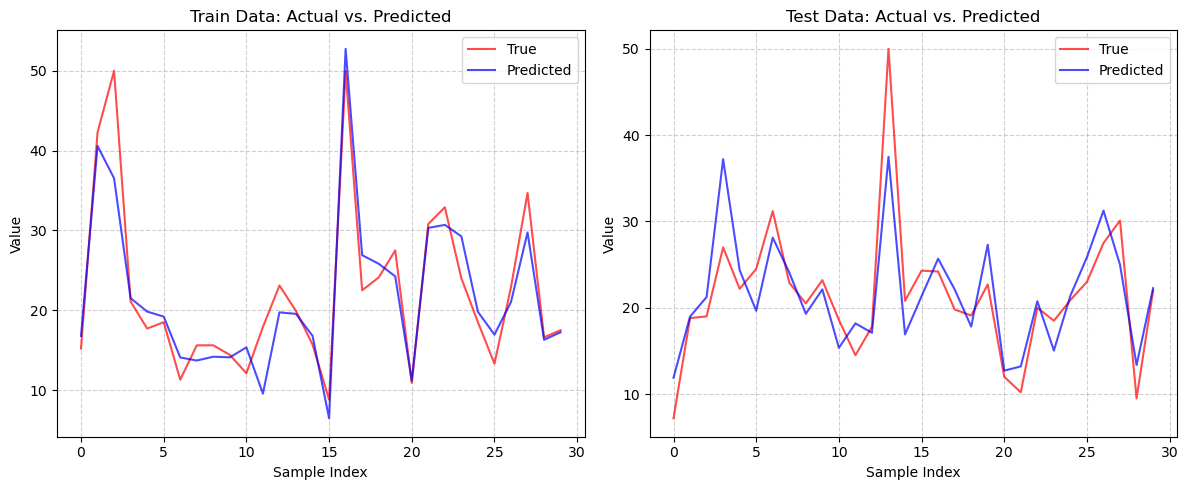


🎯 Training History Visualization 🎯



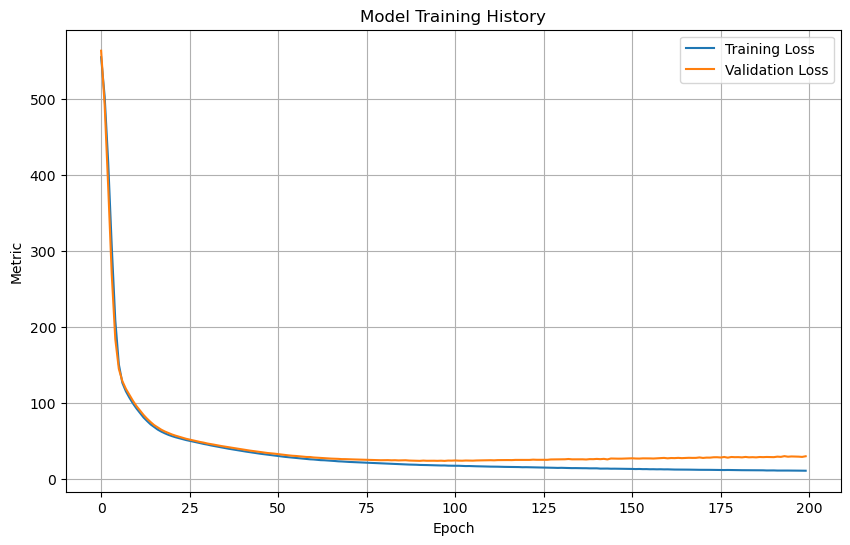


🎯 Model Accuracy Analysis 🎯

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

🔹 Model errors above 5.0 (threshold):

Prediction: [37.215855], Actual: [27.]
Prediction: [37.492485], Actual: [50.]
Prediction: [24.976627], Actual: [30.1]
Prediction: [17.148533], Actual: [23.8]
Prediction: [25.358513], Actual: [33.]
Prediction: [39.97908], Actual: [46.7]
Prediction: [22.361761], Actual: [29.6]
Prediction: [26.741398], Actual: [20.2]
Prediction: [29.683971], Actual: [35.4]
Prediction: [14.797775], Actual: [7.2]
Prediction: [44.353542], Actual: [50.]
Prediction: [40.26986], Actual: [32.4]
Prediction: [15.016916], Actual: [27.5]
Prediction: [14.279663], Actual: [8.1]
Prediction: [12.29999], Actual: [5.6]
Prediction: [26.764805], Actual: [21.7]
Prediction: [15.428109], Actual: [7.]
Prediction: [18.2303], Actual: [27.1]
Prediction: [36.88168], Actual: [25.]
Prediction: [32.179787], Actual: [42.8]
Prediction: [55.766506], Actual: [21.9]
Prediction: [33.26718], Actual: [26.7]
Prediction: [19.980307], Actu

In [ ]:
# Train the model and store the training history
print("\n🎯 Model Training 🎯\n")

# Set training parameters
batch_size = 8
epochs = 200
threshold = 5.0

# Train the model and store the training history
history = model.fit(x=train_data, y=train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels)) # type: ignore

# Evaluate the model after training
evaluate_model(model, train_data, train_labels, test_data, test_labels) # type: ignore

# Visualize the model training history
visualize_model_history(history)

# Analyze the accuracy of the regression model
accuracy = analyze_model_accuracy(model, test_data, test_labels, threshold=5.0) # type: ignore

# Add the experiment result to the experiment results csv file
add_experiment_result(
    train_data,
    train_labels,
    test_data,
    test_labels,
    model,
    batch_size,
    epochs,
    history,
    threshold,
    accuracy,
)

In [ ]:
# Create regression model

# Print header for model creation
print("\n🎯 Regression Model Creation 🎯\n")

# Define input layer with 13 features
input_layer = Input(shape=(13,))

# Define first layer with relu activation function and 4 units
first_layer = Dense(units=4, activation="relu")(input_layer)

# Define output layer with linear activation
output_layer = Dense(units=1)(first_layer)

# Define model using Functional API
model = Model(inputs=input_layer, outputs=output_layer)

# Display model summary
model.summary()

# Compile the regression model with Adam optimizer and mean squared error loss
print("\n🎯 Model Compilation 🎯\n")
model.compile(optimizer=Adam(), loss=MeanSquaredError())

In [ ]:
# Create regression model

# Print header for model creation
print("\n🎯 Regression Model Creation 🎯\n")

# Define input layer with 13 features
input_layer = Input(shape=(13,))

# Define first layer with relu activation function and 8 units
first_layer = Dense(units=8, activation="relu")(input_layer)

# Define output layer with linear activation
output_layer = Dense(units=1)(first_layer)

# Define model using Functional API
model = Model(inputs=input_layer, outputs=output_layer)

# Display model summary
model.summary()

# Compile the regression model with Adam optimizer and mean squared error loss
print("\n🎯 Model Compilation 🎯\n")
model.compile(optimizer=Adam(), loss=MeanSquaredError())

In [5]:
# Create regression model

# Print header for model creation
print("\n🎯 Regression Model Creation 🎯\n")

# Define input layer with 13 features
input_layer = Input(shape=(13,))

# Define first layer with relu activation function and 8 units
first_layer = Dense(units=8, activation="relu")(input_layer)

# Define second layer with relu activation function and 4 units
second_layer = Dense(units=4, activation="relu")(first_layer)

# Output layer with linear activation
output_layer = Dense(units=1)(second_layer)

# Define model using Functional API
model = Model(inputs=input_layer, outputs=output_layer)

# Display model summary
model.summary()

# Compile the regression model with Adam optimizer and mean squared error loss
print("\n🎯 Model Compilation 🎯\n")
model.compile(optimizer=Adam(), loss=MeanSquaredError())


🎯 Regression Model Creation 🎯



W0000 00:00:1741003855.326992   30181 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)


🎯 Model Compilation 🎯

